In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Customer-Churn-Prediction.csv')

In [3]:
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  
2      Mailed check          53.85        108.15   Yes  

[3 rows x 21 columns]

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df2 = df.copy()

In [6]:
df3=df.copy()

In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
df['customerID'].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

C:\Users\Tanvir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

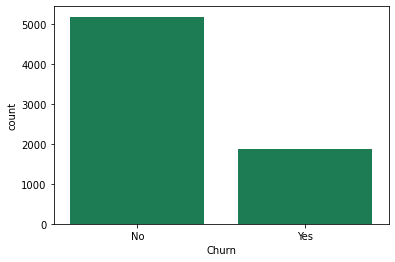

In [11]:
sns.countplot(df['Churn'],color='#0f8b57')

In [12]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(7043, 21)

# Basic Visualization using Seaborn Library

<AxesSubplot:xlabel='count', ylabel='gender'>

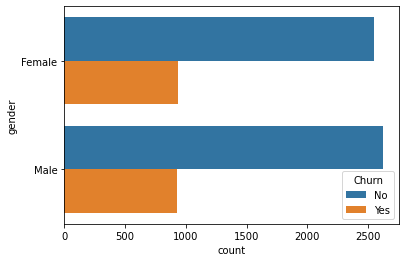

In [14]:
sns.countplot(y = 'gender', hue='Churn', data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

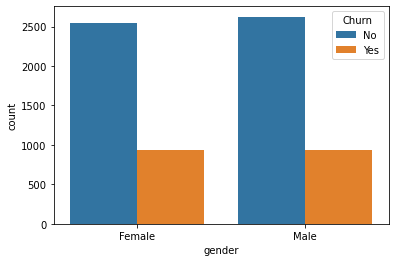

In [15]:
sns.countplot(x = 'gender', hue='Churn', data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

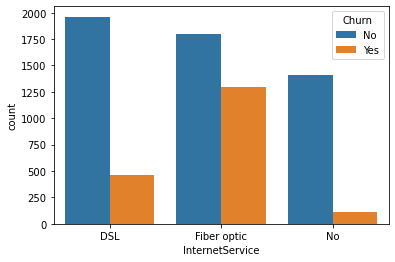

In [16]:
sns.countplot(x = 'InternetService', hue='Churn', data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

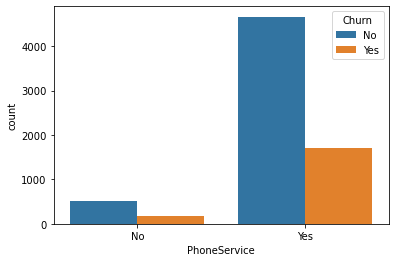

In [17]:
sns.countplot(x = 'PhoneService',hue='Churn', data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

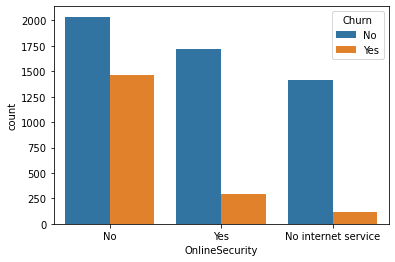

In [18]:
sns.countplot(x = 'OnlineSecurity',hue='Churn', data=df)

In [19]:
df['OnlineSecurity'].unique() 

array(['No', 'Yes', 'No internet service'], dtype=object)

In [20]:
df['OnlineSecurity'].value_counts() 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

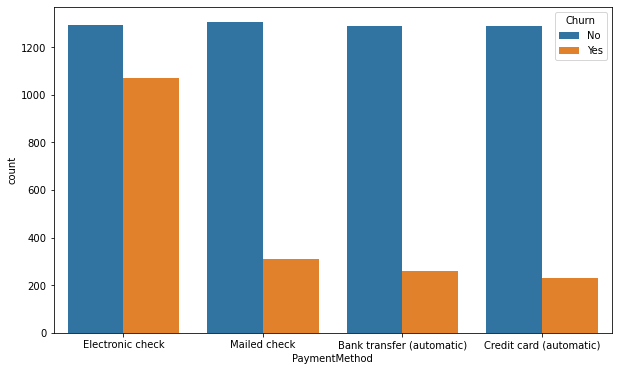

In [21]:
plt.subplots(figsize=(10,6)) 
sns.countplot(x = 'PaymentMethod',hue='Churn', data=df) 

# Preprocess the dataset

In [22]:
#Drop Customer id
df = df.drop('customerID', axis=1)

In [23]:
df.shape

(7043, 20)

# Encode the data set

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label = LabelEncoder()

In [26]:
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [27]:
df.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1

# seperate x, y

In [28]:
x = df.drop('Churn',axis=1) #separate dependent and independent variable
y = df['Churn']

In [29]:
x.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85          2505  
1                 0              3           56.95          1466  
2                 1              3           53.85           157

In [30]:
y.head(3)

0    0
1    0
2    1
Name: Churn, dtype: int32

In [31]:
x.shape

(7043, 19)

In [32]:
y.shape

(7043,)

# Imbalanced Data Handling 

In [33]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [34]:
churned = (5174/(5174+1869)) * 100
not_churned = (1869/(5174+1869)) * 100

In [35]:
print('Not churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not churned 26.536987079369588 percent of total people
Churned 73.4630129206304 percent of total people


In [36]:
churn_no = df[df['Churn']==0]
churn_yes = df[df['Churn']==1]

In [37]:
churn_no.shape

(5174, 20)

In [38]:
churn_yes.shape

(1869, 20)

# Synthetic Minority Oversampling Technique (SMOTETomek)

In [39]:
from imblearn.combine import SMOTETomek

In [40]:
sm = SMOTETomek(random_state=42)

In [41]:
X,Y = sm.fit_resample(x,y)

In [42]:
X.shape

(9612, 19)

In [43]:
Y.shape

(9612,)

In [44]:
Y.value_counts()

0    4806
1    4806
Name: Churn, dtype: int64

In [45]:
X.head(2)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85          2505  
1                 0              3           56.95          1466

# Near miss for  Under Sampling

In [46]:
from imblearn.under_sampling import NearMiss

In [47]:
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [48]:
new_x

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        0           0       1             1   
1          1              0        0           0       1             1   
2          1              0        0           0       1             1   
3          1              0        0           0       1             1   
4          1              0        0           0       1             1   
...      ...            ...      ...         ...     ...           ...   
3733       1              0        0           0      12             1   
3734       0              0        0           0       9             1   
3735       1              1        0           0       1             1   
3736       0              0        0           0      67             1   
3737       1              1        1           0       4             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                2               1             1   
1                 0                1               0             0   
2                 0                2               1             1   
3                 0                2               1             1   
4                 0                2               1             1   
...             ...              ...             ...           ...   
3733              0                0               0             0   
3734              0                0               0             0   
3735              2                1               0             0   
3736              2                1               2             2   
3737              2                1               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    1            1            1                1         0   
1                    0            0            0                0         0   
2                    1            1            1                1         0   
3                    1            1            1                1         0   
4                    1            1            1                1         0   
...                ...          ...          ...              ...       ...   
3733                 0            2            2                0         1   
3734                 0            0            0                0         0   
3735                 0            0            0                0         0   
3736                 2            0            2                0         0   
3737                 0            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    0              3           20.90          1624  
1                    1              2           69.90          5454  
2                    0              3           20.20          1610  
3                    0              3           20.20          1610  
4                    0              3           20.20          1610  
...                ...            ...             ...           ...  
3733                 1              2           59.80          5651  
3734                 1              0           44.20          3448  
3735                 1              2           75.75          5776  
3736                 1              1          102.95          5431  
3737                 1              3           74.40          2660  

[3738 rows x 19 columns]

In [49]:
new_x.shape

(3738, 19)

In [50]:
new_y


0       0
1       0
2       0
3       0
4       0
       ..
3733    1
3734    1
3735    1
3736    1
3737    1
Name: Churn, Length: 3738, dtype: int32

In [51]:
new_y.shape

(3738,)

In [52]:
3738/2

1869.0

In [53]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [54]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# Over Sampling

In [56]:
df2.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  
2      Mailed check          53.85        108.15   Yes  

[3 rows x 21 columns]

In [57]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [59]:
from imblearn.over_sampling import RandomOverSampler

In [60]:
over = RandomOverSampler(random_state=100)

In [61]:
new_x1 , new_y1 = over.fit_resample(x,y)

In [62]:
new_x1.shape

(10348, 19)

In [63]:
new_y1.shape

(10348,)

In [64]:
new_y1.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Cross Validation

## Hold Out Cross Validation

In [92]:
from sklearn.model_selection import train_test_split 

In [93]:
xtrain,xtest, ytrain,ytest = train_test_split(x, y, train_size=.75,random_state=42)

In [94]:
xtrain.head(2)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
6607       1              0        0           1       1             0   
2598       0              0        0           0       7             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
6607              1                0               0             0   
2598              0                1               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
6607                 0            0            0                0         0   
2598                 2            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
6607                 1              2           25.30          2153  
2598                 1              2           75.15          4396

In [95]:
xtest.head(2)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185        0              0        1           0       1             0   
2715       1              0        0           0      41             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
185               1                0               0             0   
2715              2                2               1             1   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
185                  0            0            0                0         0   
2715                 1            1            1                1         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
185                  1              2           24.80          2044  
2715                 1              0           25.25          6522

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
Clf = DecisionTreeClassifier()

In [98]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [99]:
print("Score for general: ", Clf.score(xtest,ytest))

Score for general:  0.7314026121521863


# Hold out Cross Validation For Under Sampling SMOTETomek

In [144]:
from sklearn.model_selection import train_test_split 

In [145]:
xtrain1,xtest1, ytrain1,ytest1 = train_test_split(X, Y, train_size=.75,random_state=42)

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
Clf1 = DecisionTreeClassifier()

In [148]:
Clf1.fit(xtrain1,ytrain1)

DecisionTreeClassifier()

In [150]:
print("Score for SMOTETomek: ", Clf1.score(xtest1,ytest1))

Score for SMOTETomek:  0.8114856429463171


# Hold out Cross Validation For Under Sampling

In [129]:
xtrain2,xtest2, ytrain2,ytest2 = train_test_split(new_x, new_y, train_size=.75,random_state=42)

In [130]:
xtrain2.head(2)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1784       0              1        0           0      40             1   
611        0              0        0           0      46             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1784              0                1               0             0   
611               2                1               0             2   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1784                 0            0            2                2         0   
611                  2            0            0                2         1   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
1784                 1              2           91.55          3168  
611                  1              2           94.15          3753

In [131]:
xtest2.head(2)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1151       0              0        0           0      26             1   
538        1              0        1           1      61             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1151              2                1               0             0   
538               2                1               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1151                 2            0            0                0         0   
538                  2            0            2                2         1   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
1151                 1              2            80.7          1813  
538                  1              2            99.9          5064

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
Clf2 = DecisionTreeClassifier()

In [134]:
Clf2.fit(xtrain2,ytrain2)

DecisionTreeClassifier()

In [135]:
print("Score For Under Sampling: ",Clf2.score(xtest2,ytest2))

Score For Under Sampling:  0.6171122994652406


# Hold out Cross Validation For Over Sampling

In [136]:
xtrain3,xtest3, ytrain3,ytest3 = train_test_split(new_x1, new_y1, train_size=.75,random_state=42)

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
Clf3 = DecisionTreeClassifier()

In [141]:
Clf3.fit(xtrain3,ytrain3)

DecisionTreeClassifier()

In [143]:
print("Score For Over Sampling: ",Clf3.score(xtest3,ytest3))

Score For Over Sampling:  0.8647081561654426


## In hold out Cross Validation The score is:

Score for general:  0.7314026121521863

Score for SMOTETomek:  0.8114856429463171

Score For Under Sampling:  0.6171122994652406

Score For Over Sampling:  0.8647081561654426

# XGBoost Classifier

In [156]:
import xgboost 
from xgboost import XGBClassifier

C:\Users\Tanvir\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [157]:
xgb = XGBClassifier()

In [158]:
xgb.fit(xtrain,ytrain)

C:\Users\Tanvir\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Tanvir\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [161]:
xgb.fit(xtrain1,ytrain1)

C:\Users\Tanvir\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Tanvir\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [162]:
xgb.fit(xtrain2,ytrain2)

[12:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
xgb.fit(xtrain3,ytrain3)

[12:04:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
print("xgb score for general: ",xgb.score(xtest,ytest))

xgb score for general:  0.860456126787785


In [165]:
print("xgb score for SMOTETomek: ",xgb.score(xtest1,ytest1))

xgb score for SMOTETomek:  0.8905534748231377


C:\Users\Tanvir\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [166]:
print("xgb score for Under Sampling: ",xgb.score(xtest2,ytest2))

xgb score for Under Sampling:  0.8438502673796792


C:\Users\Tanvir\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [168]:
print("xgb score for Over Sampling: ",xgb.score(xtest3,ytest3))

xgb score for Over Sampling:  0.860456126787785


C:\Users\Tanvir\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## In Hold Out Cross Validation Score 

xgb score for general:  0.860456126787785

xgb score for SMOTETomek:  0.8905534748231377

xgb score for Under Sampling:  0.8438502673796792

xgb score for Over Sampling:  0.860456126787785


In [172]:
from sklearn.ensemble import AdaBoostClassifier

In [173]:
ada = AdaBoostClassifier()

In [174]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [175]:
ada.fit(xtrain1,ytrain1)

AdaBoostClassifier()

In [176]:
ada.fit(xtrain2,ytrain2)

AdaBoostClassifier()

In [177]:
ada.fit(xtrain3,ytrain3)

AdaBoostClassifier()

In [178]:
print("ada score for general: ",ada.score(xtest,ytest))
print("ada score for SMOTETomek: ",ada.score(xtest1,ytest1))
print("ada score for Under Sampling: ",ada.score(xtest2,ytest2))
print("ada score for Over Sampling: ",ada.score(xtest3,ytest3))


ada score for general:  0.7715500579822188
ada score for SMOTETomek:  0.8039950062421972
ada score for Under Sampling:  0.613903743315508
ada score for Over Sampling:  0.7715500579822188


# K Fold Cross Validation

In [179]:
from sklearn.model_selection import KFold, cross_val_score

In [180]:
kfold = KFold(n_splits=5) #each fold contain 20% data

In [186]:
result = cross_val_score(ada,x,y,cv=kfold) 

In [187]:
result1 = cross_val_score(ada,X,Y,cv=kfold) 

In [188]:
result2 = cross_val_score(ada,new_x,new_y,cv=kfold) 

In [189]:
result3 = cross_val_score(ada,new_x1,new_y1,cv=kfold) 

In [195]:
print(" In K-Fold cross validation ")

print("ada score for general: ",result)
print("ada score for SMOTETomek: ",result1)
print("ada score for Under Sampling: ",result2)
print("ada score for Over Sampling: ",result3)

 In K-Fold cross validation 
ada score for general:  [0.8105039  0.80766501 0.79630944 0.79261364 0.80184659]
ada score for SMOTETomek:  [0.78523141 0.77223089 0.77263267 0.88033299 0.88709677]
ada score for Under Sampling:  [0.3342246  0.46256684 0.70053476 0.49933066 0.53145917]
ada score for Over Sampling:  [0.72657005 0.7173913  0.72222222 0.76800387 0.69163847]


# Stratified k fold cross Validation

In [205]:
from sklearn.model_selection import StratifiedKFold

In [206]:
st = StratifiedKFold(n_splits=4)

In [207]:
score = cross_val_score(Clf,x,y,cv=st)

In [208]:
score1 = cross_val_score(Clf,X,Y,cv=st)

In [209]:
score2 = cross_val_score(Clf,new_x,new_y,cv=st)

In [210]:
score3 = cross_val_score(Clf,new_x1,new_y1,cv=st)

In [214]:
print("Score for K fold cross Validation in general:  ",score)
print("Score for K fold cross Validation in SMOTETomek:  ",score1)
print("Score for K fold cross Validation in Under Sampling:  ",score2)
print("Score for K fold cross Validation in Over Sampling:  ",score3)

Score for K fold cross Validation in general:   [0.7274276  0.73537763 0.7120954  0.73920455]
Score for K fold cross Validation in SMOTETomek:   [0.68789014 0.8102372  0.84852268 0.85185185]
Score for K fold cross Validation in Under Sampling:   [0.46096257 0.60855615 0.60813704 0.58779443]
Score for K fold cross Validation in Over Sampling:   [0.85581755 0.86973328 0.88867414 0.89872439]


In [215]:
print("Mean Score for K fold cross Validation in general:  ",score.mean())
print("Mean Score for K fold cross Validation in SMOTETomek:  ",score1.mean())
print("Mean Score for K fold cross Validation in Under Sampling:  ",score2.mean())
print("Mean Score for K fold cross Validation in Over Sampling:  ",score3.mean())

Mean Score for K fold cross Validation in general:   0.7285262925249084
Mean Score for K fold cross Validation in SMOTETomek:   0.7996254681647941
Mean Score for K fold cross Validation in Under Sampling:   0.5663625485234001
Mean Score for K fold cross Validation in Over Sampling:   0.8782373405488983


# Leave One Out Cross Validation

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
le = LeaveOneOut()

In [ ]:
result = cross_val_score(ada,x,y,cv=le)

In [ ]:
result1 = cross_val_score(ada,X,Y,cv=le)

In [ ]:
result2 = cross_val_score(ada,new_x,new_y,cv=le)

In [ ]:
result3 = cross_val_score(ada,new_x1,new_y1,cv=le)

In [ ]:
print("Score for K fold cross Validation in general:  ",result)
print("Score for K fold cross Validation in SMOTETomek:  ",result1)
print("Score for K fold cross Validation in Under Sampling:  ",result2)
print("Score for K fold cross Validation in Over Sampling:  ",result3)

In [ ]:
print("Mean Score for K fold cross Validation in general:  ",result.mean())
print("Mean Score for K fold cross Validation in SMOTETomek:  ",result1.mean())
print("Mean Score for K fold cross Validation in Under Sampling:  ",result2.mean())
print("Mean Score for K fold cross Validation in Over Sampling:  ",result3.mean())